# Abgabe Data Exploration Project


## Auswahl Datensatz

Für das Data Exploration Projekt wurde ein Datensatz gewählt, der sich mit Immobilienverkäufen im Raum Washington, USA, befasst. Dieser Datensatz umfasst Daten zu verschiedenen Aspekten des Immobilienmarktes, einschließlich Verkaufspreise, Anzahl der Schlafzimmer und Badezimmer, Wohnfläche in Quadratfuß, Grundstücksgröße, Etagenanzahl, Vorhandensein einer Wasserfront, Aussicht, Zustand der Immobilie, Baujahr, Wohnfläche oberhalb der Erde, Kellerfläche, Jahr der Renovierung, Straßenadresse, Stadt, Postleitzahl und Land. Die Auswahl fiel auf diesen Datensatz, da er eine breite Palette an Features bietet, die für das Verständnis der Dynamik und Preisgestaltung auf dem Immobilienmarkt relevant sind. Zudem spiegelt der Handel mit Immobilien einen stets aktuellen und dynamischen Markt wider, was die Relevanz dieses Datensatzes für das Verständnis von Markttrends und Preisgestaltungsmechanismen unterstreicht.

In [56]:
# benötigten Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats as sp
from sklearn.model_selection import train_test_split

df = pd.read_csv("Daten/data.csv")

## Charakterisierung des Datensatzes

In [57]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Hier wird der Datensatz erstmal auf Null-Werte überprüft, die später die Berechnungen verfälschen könnten. Wie jedoch zu sehen ist, enthält jede spalte genau 4600 Einträge was auf keine leeren Zeilen hinweist.

In [59]:
# Zählt eindeutige Werte je Spalte.
df.nunique(axis = 0)  

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [60]:
# Überprüfung auf Duplikate
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f"Anzahl der Duplikate im Datensatz: {duplicate_count}")
else:
    print("Keine Duplikate gefunden.")

Keine Duplikate gefunden.


In [61]:
# Erzeugt und transponiert deskriptive Statistiken der numerischen Spalten.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.00,551962.99,563834.70,0.00,322875.00,460943.46,654962.50,26590000.00
bedrooms,4600.00,3.40,0.91,0.00,3.00,3.00,4.00,9.00
bathrooms,4600.00,2.16,0.78,0.00,1.75,2.25,2.50,8.00
sqft_living,4600.00,2139.35,963.21,370.00,1460.00,1980.00,2620.00,13540.00
sqft_lot,4600.00,14852.52,35884.44,638.00,5000.75,7683.00,11001.25,1074218.00
floors,4600.00,1.51,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,4600.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00
view,4600.00,0.24,0.78,0.00,0.00,0.00,0.00,4.00
condition,4600.00,3.45,0.68,1.00,3.00,3.00,4.00,5.00
sqft_above,4600.00,1827.27,862.17,370.00,1190.00,1590.00,2300.00,9410.00


Basierend auf der dargestellten Auswertung gibt es mehrere Auffälligkeiten und potenzielle Probleme im Datensatz, die weitere Untersuchungen erfordern:

    - Preis von 0 
    - Schlafzimmer und Badezimmer von 0
    - Sehr hoher maximaler Preis ( über 26 mio)

In [62]:
# Zählen und Ausgeben der Anzahl von Einträgen mit einem Hauspreis von 0
zero_price_count        = (df.price     == 0.0).sum()
zero_bedrooms_count     = (df.bedrooms  == 0.0).sum()
zero_bathrooms_count    = (df.bathrooms == 0.0).sum()

print(f"Anzahl der Einträge mit einem Hauspreis von 0: {zero_price_count}")
print(f"Anzahl der Einträge mit einem Schlafzimmer von 0: {zero_bedrooms_count}")
print(f"Anzahl der Einträge mit einem Badezimmer von 0: {zero_bathrooms_count}")

Anzahl der Einträge mit einem Hauspreis von 0: 49
Anzahl der Einträge mit einem Schlafzimmer von 0: 2
Anzahl der Einträge mit einem Badezimmer von 0: 2


In [63]:
# Ersetzt alle 0-Werte in der 'price', 'bedrooms', 'bathrooms'-Spalte durch NaN
df['price']       = df['price'].replace(0, np.nan)
df['bedrooms']    = df['bedrooms'].replace(0, np.nan)
df['bathrooms']   = df['bathrooms'].replace(0, np.nan)


# Ermittelt und gibt die Anzahl der fehlenden Werte (NaNs) 
df.isnull().sum()

date              0
price            49
bedrooms          2
bathrooms         2
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [64]:
# Entfernt Zeilen mit NaN Einträge
df.dropna(inplace=True)

zero_price_count_after_cleaning     = (df.price == 0).sum()
zero_bedrooms_count_after_cleaning  = (df.bedrooms == 0).sum()
zero_bathrooms_count_after_cleaning = (df.bathrooms == 0).sum()

print(f"Anzahl der Einträge mit einem Hauspreis von 0 nach der Bereinigung: {zero_price_count_after_cleaning}")
print(f"Anzahl der Einträge mit einem Schlafzimmer von 0 nach der Bereinigung: {zero_bedrooms_count_after_cleaning}")
print(f"Anzahl der Einträge mit einem Badezimmer von 0 nach der Bereinigung: {zero_bathrooms_count_after_cleaning}")

Anzahl der Einträge mit einem Hauspreis von 0 nach der Bereinigung: 0
Anzahl der Einträge mit einem Schlafzimmer von 0 nach der Bereinigung: 0
Anzahl der Einträge mit einem Badezimmer von 0 nach der Bereinigung: 0


Nachdem die Datensätze mit fehlenden Werten entfernt wurden, kann nun gezielt nach der Immobilie mit dem außergewöhnlich hohen Preis gesucht werden. Um alle Ausreißer zu identifizieren, wird der Interquartilsabstand (IQR) herangezogen. Aufgrund der ungleichen Verteilung einzelner Merkmale im Datensatz, wird ein besonders aggressiver Multiplikator von 5 verwendet. Dieser Ansatz zielt darauf ab, ausschließlich die extremsten Ausreißer zu erfassen.

In [65]:
# IQR für den Preis pro Quadratfuß berechnen
df['price_per_sqft'] = df['price'] / df['sqft_living']


# Berechnung des Interquartilsabstands (IQR) für den Preis pro Quadratfuß
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Festlegung der Grenzen für die Ausreißer
lower_bound = Q1 - 5 * IQR  #Mulitplikator sehr agressive gewählt, um nicht zu viel als Ausreißer zu makieren
upper_bound = Q3 + 5 * IQR

outliers = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Speichern der Ausreißer in einem neuen DataFrame
outliers_df = outliers.copy()

# Anzahl der Ausreißer anzeigen
print(f"Anzahl der Ausreißer im Preis pro Quadratfuß: {outliers_df.shape[0]}")



Anzahl der Ausreißer im Preis pro Quadratfuß: 5


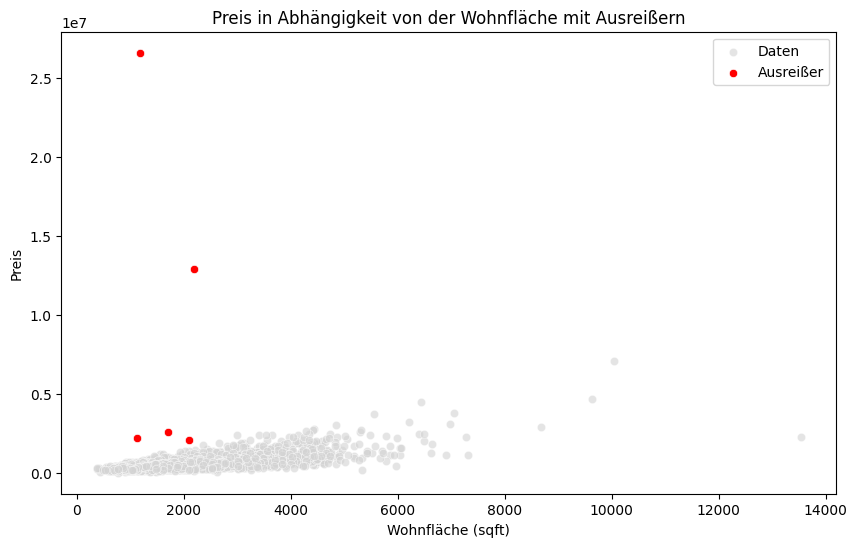

In [66]:
# Plot aller Daten
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, color='lightgray', alpha=0.6)

# Hervorheben der Ausreißer
sns.scatterplot(x='sqft_living', y='price', data=outliers, color='red')
pyplot.title('Preis in Abhängigkeit von der Wohnfläche mit Ausreißern')
pyplot.xlabel('Wohnfläche (sqft)')
pyplot.ylabel('Preis')
pyplot.legend(['Daten', 'Ausreißer'])
pyplot.show()

In der Analyse wurden 5 Ausreißer identifiziert, was auf eine bedeutende Streuung im Vergleich zum Durchschnitt des Datensatzes hindeutet. Diese befinden sich deutlich über der Mehrheit der Daten, was auf außergewöhnlich teure Immobilien hindeuten könnte. Diese Ausreißer verdienen eine genauere Untersuchung, um zu verstehen, ob sie aufgrund einzigartiger Eigenschaften oder möglicherweise aufgrund von Eingabefehlern zu diesen extremen Preispunkten geführt haben. 

Nächsten Schritte:

    - Detaillierte Untersuchung der Ausreißer
    - Entscheidung über die Behandlung der Ausreißer

In [67]:
pd.set_option('display.float_format', '{:.2f}'.format)
outliers_df.describe()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sqft
count,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
mean,9271879.67,3.40,1.90,1660.00,7095.60,1.20,0.00,0.00,3.60,1240.00,420.00,1975.80,1200.80,6578.04
std,10717058.25,0.55,0.65,499.75,3730.87,0.45,0.00,0.00,0.89,196.09,446.71,20.75,1096.21,9127.23
min,2110000.00,3.00,1.00,1120.00,1664.00,1.00,0.00,0.00,3.00,1050.00,0.00,1956.00,0.00,1004.76
25%,2199900.00,3.00,1.50,1180.00,5427.00,1.00,0.00,0.00,3.00,1120.00,0.00,1959.00,0.00,1497.37
50%,2560498.33,3.00,2.00,1710.00,7793.00,1.00,0.00,0.00,3.00,1180.00,410.00,1969.00,1989.00,1964.20
75%,12899000.00,4.00,2.50,2100.00,9200.00,1.00,0.00,0.00,4.00,1300.00,640.00,1992.00,2001.00,5889.95
max,26590000.00,4.00,2.50,2190.00,11394.00,2.00,0.00,0.00,5.00,1550.00,1050.00,2003.00,2014.00,22533.90


In [68]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sqft
count,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00
mean,557625.65,3.40,2.16,2131.58,14834.60,1.51,0.01,0.23,3.45,1821.29,310.29,1970.79,808.04,268.72
std,563891.45,0.90,0.78,955.23,35971.14,0.54,0.08,0.77,0.68,853.29,462.04,29.76,979.31,358.43
min,7800.00,1.00,0.75,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00,10.00
25%,326100.00,3.00,1.75,1460.00,5000.00,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00,182.85
50%,465000.00,3.00,2.25,1970.00,7680.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00,245.41
75%,657500.00,4.00,2.50,2610.00,10970.00,2.00,0.00,0.00,4.00,2300.00,600.00,1997.00,1999.00,315.68
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00,22533.90


In [69]:
pd.set_option('display.float_format', '{:.2f}'.format)
outliers_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_per_sqft
4346,2014-06-23 00:00:00,12899000.00,3.00,2.50,2190,11394,1.00,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA,5889.95
4347,2014-05-08 00:00:00,2110000.00,4.00,1.00,2100,9200,1.00,0,0,3,1050,1050,1959,1989,14070 Military Rd S,Tukwila,WA 98168,USA,1004.76
4348,2014-05-05 00:00:00,2199900.00,4.00,1.50,1120,5427,1.00,0,0,3,1120,0,1969,2014,19009-19021 SE 266th St,Covington,WA 98042,USA,1964.20
4350,2014-07-03 00:00:00,26590000.00,3.00,2.00,1180,7793,1.00,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA,22533.90
4465,2014-06-05 00:00:00,2560498.33,3.00,2.50,1710,1664,2.00,0,0,5,1300,410,2003,0,2826 21st Ave W,Seattle,WA 98199,USA,1497.37


Die Analyse führte zum Ausschluss des Hauses mit der ID 4350 aus dem Datensatz, da sein Preis unverhältnismäßig hoch ist im Vergleich zu den Häusern ähnlicher Größe, Ausstattung und neuerem Baujahr. Das Haus mit der ID 4346 wird ebenfalls entfernt, weil sein Preis sich angesichts ähnlicher Merkmale zu anderen Häusern nicht rechtfertigen lässt.

In [70]:

df = df.drop(index=[4350, 4346])



df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4547.00,549186.30,368056.31,7800.00,326050.00,465000.00,657050.00,7062500.00
bedrooms,4547.00,3.40,0.90,1.00,3.00,3.00,4.00,9.00
bathrooms,4547.00,2.16,0.78,0.75,1.75,2.25,2.50,8.00
sqft_living,4547.00,2131.78,955.34,370.00,1460.00,1970.00,2610.00,13540.00
sqft_lot,4547.00,14836.90,35978.87,638.00,5000.00,7680.00,10966.00,1074218.00
floors,4547.00,1.51,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,4547.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00
view,4547.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,4547.00,3.45,0.68,1.00,3.00,3.00,4.00,5.00
sqft_above,4547.00,1821.49,853.42,370.00,1190.00,1590.00,2300.00,9410.00


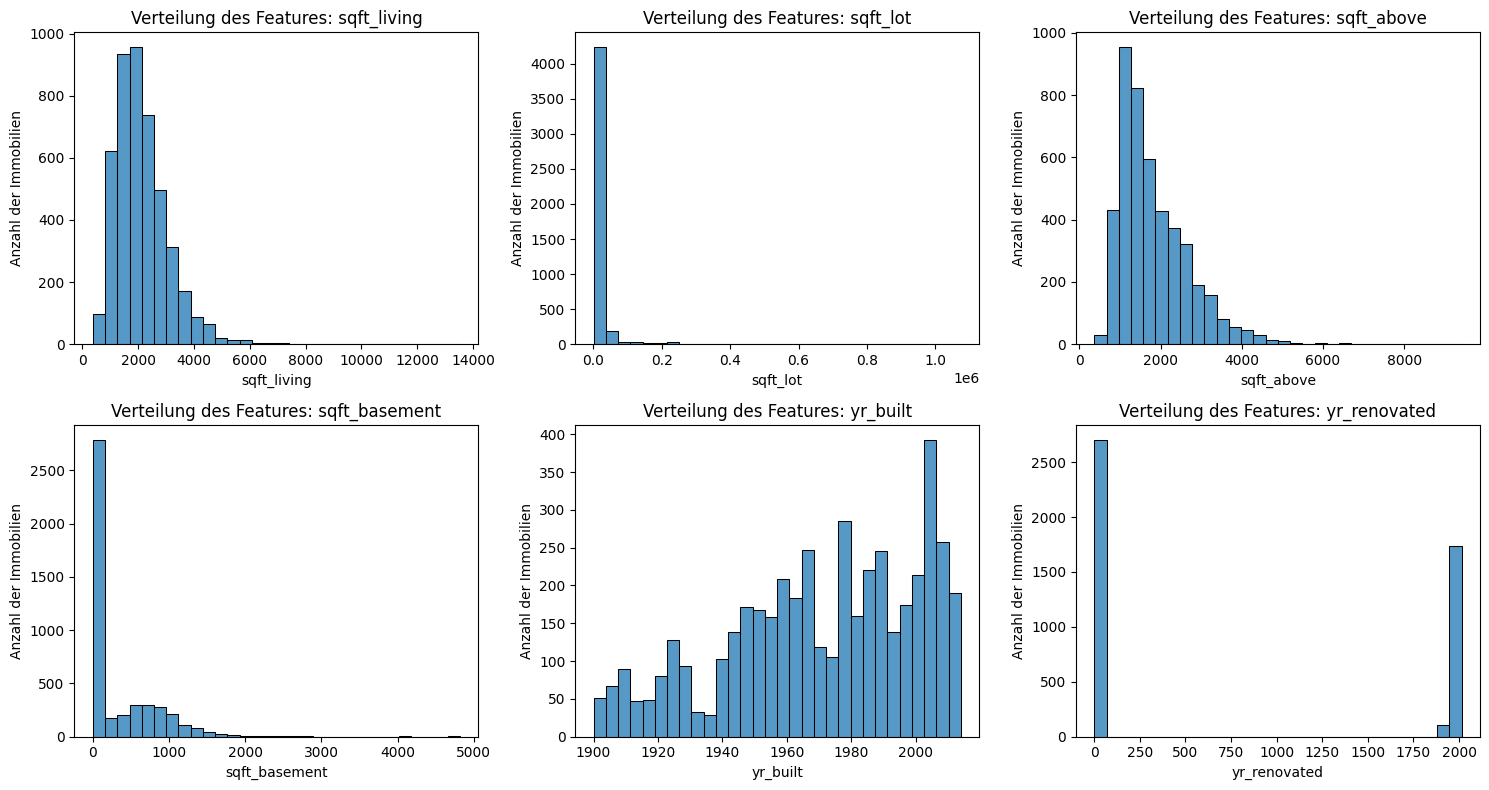

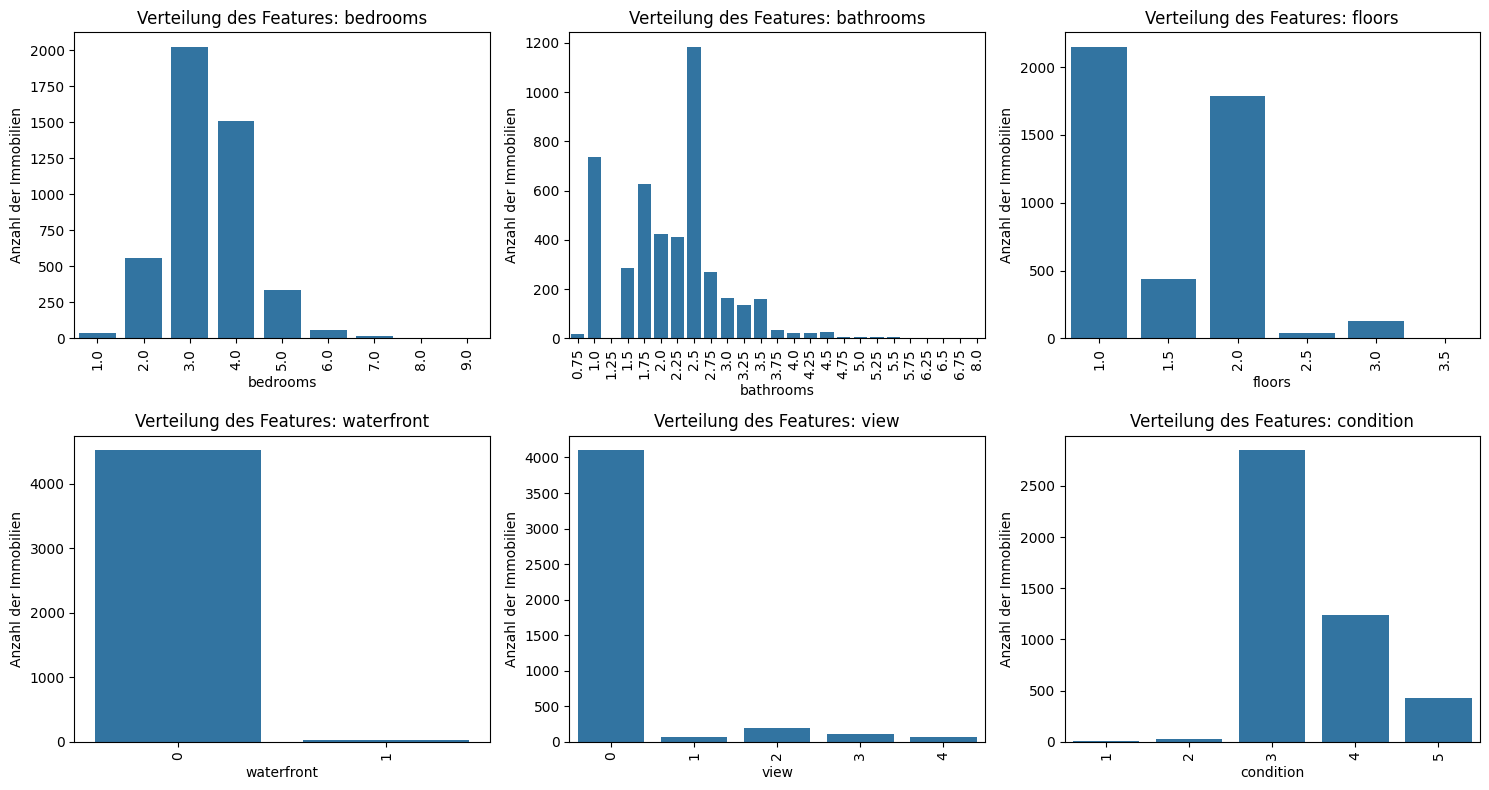

In [71]:
# Bestimmen, wie viele Subplots pro Zeile angezeigt werden sollen
subplots_per_row = 3

# Berechnen, wie viele Reihen benötigt werden
num_rows_continuous = -(-len(continuous_features) // subplots_per_row)
num_rows_categorical = -(-len(categorical_features) // subplots_per_row)

# Erstellen der Subplots für kontinuierliche Features
fig, axs = pyplot.subplots(num_rows_continuous, subplots_per_row, figsize=(15, num_rows_continuous * 4))
axs = axs.flatten()  # Flachmachen der Achsen für einfachen iterativen Zugang
for i, feature in enumerate(continuous_features):
    sns.histplot(df[feature], kde=False, bins=30, ax=axs[i])
    axs[i].set_title(f'Verteilung des Features: {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Anzahl der Immobilien')
pyplot.tight_layout()
pyplot.show()

# Erstellen der Subplots für kategoriale Features
fig, axs = pyplot.subplots(num_rows_categorical, subplots_per_row, figsize=(15, num_rows_categorical * 4))
axs = axs.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axs[i])
    axs[i].set_title(f'Verteilung des Features: {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Anzahl der Immobilien')
    axs[i].tick_params(axis='x', rotation=90)
pyplot.tight_layout()
pyplot.show()

Die Dominanz von Familienhäusern mit 3-4 Schlafzimmern im Datensatz deutet darauf hin, dass unser Algorithmus in der Vorhersage solcher Standardimmobilien effektiver sein wird, während er bei ungewöhnlichen Immobilienarten weniger genau sein könnte. Um die Vorhersagegenauigkeit über ein breiteres Spektrum von Immobilientypen zu erhöhen, könnten Anpassungen wie Stratified Sampling und Feature-Skalierung notwendig sein.

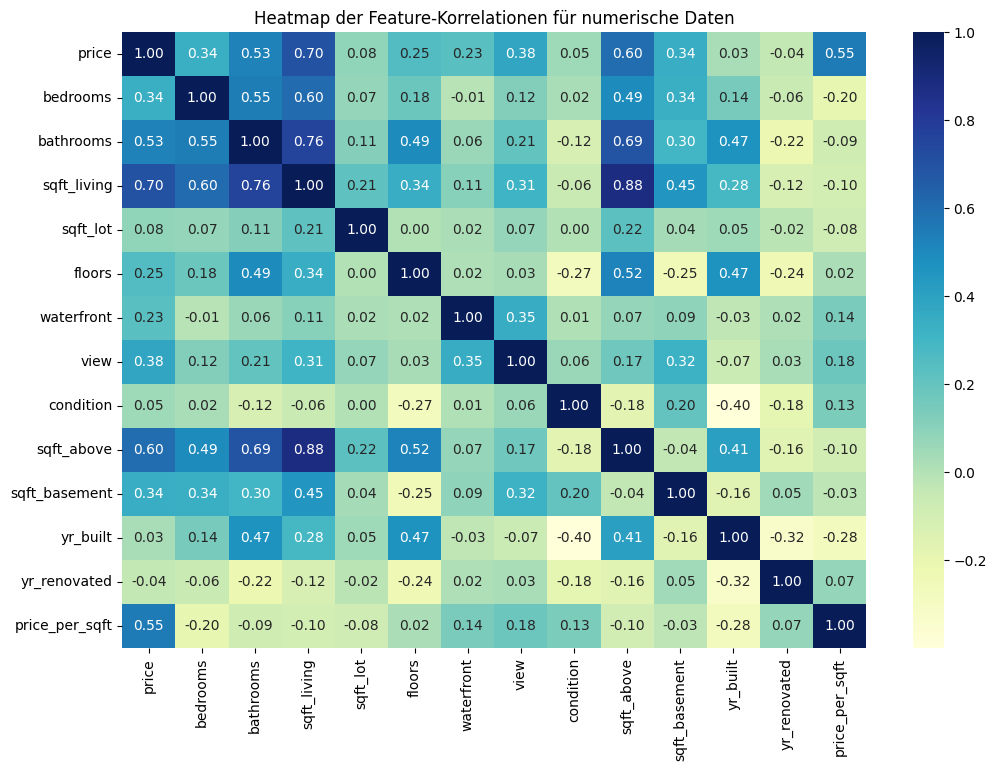

In [74]:
# Berechnung der Korrelationsmatrix
# Entferne nicht-numerische Spalten
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Berechnung der Korrelationsmatrix für numerische Daten
corr_matrix_numerical = numerical_df.corr()

# Erstellung der Heatmap für die numerische Korrelationsmatrix
pyplot.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_numerical, annot=True, fmt=".2f", cmap='YlGnBu')
pyplot.title('Heatmap der Feature-Korrelationen für numerische Daten')
pyplot.show()

Die Wohnfläche (sqft_living), oberirdische Wohnfläche (sqft_above), Kellerfläche (sqft_basement), Anzahl der Badezimmer (bathrooms) und Schlafzimmer (bedrooms) sind wegen ihrer starken Korrelation mit dem Immobilienpreis Schlüsselelemente für die Preisvorhersage. Waterfront und view könnten weniger Gewicht im Modell erhalten, da ihre Korrelation mit dem Preis schwächer ist. Features mit geringer Korrelation sollten möglicherweise entfernt werden, um das Modell zu straffen und Überanpassung zu vermeiden. 

## Feature Engineering


In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_per_sqft
0,2014-05-02 00:00:00,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,233.58
1,2014-05-02 00:00:00,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,653.15
2,2014-05-02 00:00:00,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,177.20
3,2014-05-02 00:00:00,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,210.00
4,2014-05-02 00:00:00,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,283.51
